In [1]:
using NamedTrajectories
using QuantumCollocation
using CairoMakie
using LaTeXStrings

In [33]:
data_path = "results/mintime/Y_gate_T_100_Q_100.0_R_0.0001_R_smoothness_0.001_iter_10000_fidelity_0.9999999962678012_00000.jld2"
traj = load_problem(data_path; return_data=true)["trajectory"]
plot_dir = "plots/paper"
plot_path = joinpath(plot_dir, "fig_single_qubit.svg")


Loading data dict from results/mintime/Y_gate_T_100_Q_100.0_R_0.0001_R_smoothness_0.001_iter_10000_fidelity_0.9999999962678012_00000.jld2:

   duration = 1.707122230980351
   exp fidelity = 0.9999905670991444


"plots/paper/fig_single_qubit.svg"

In [34]:
U = iso_vec_to_operator(traj[end].Ũ⃗)
U_goal = iso_vec_to_operator(traj.goal.Ũ⃗)
1 - unitary_fidelity(U, U_goal)

4.71646199207143e-6

In [47]:
1 - 0.9999952835380079

4.71646199207143e-6

In [42]:
sum(vec(traj.Δt[1:end-2]))


1.672979786360743

In [ ]:
1-

In [26]:
1 - 0.99999056709914443

9.432900666683786e-6

1×100 Matrix{Float64}:
 0.0170712  0.0170712  0.0170712  …  0.0170712  0.0170712  0.0170712

In [28]:
function plot_states_and_controls(
    states::AbstractMatrix{<:Real},
    controls::AbstractMatrix{<:Real},
    times::AbstractVector{<:Real};
    # style keyword arguments
    size::Tuple{Int, Int}=(1200, 900),
    titlesize::Int=36,
    series_color::Symbol=:glasbey_bw_minc_20_n256,
    ignored_labels::Union{Symbol, Vector{Symbol}, Tuple{Vararg{Symbol}}} =
        Symbol[],
    labelsize=40,
    xticksize = 35,
    yticksize = 35,
    xsize = 36,
    ysize = 36,
    title_states="States",
    labels_states=nothing,
    ylabel_states="Population",
    title_controls="Controls",
    labels_controls=[L"u_%$i" for i = 1:size(controls, 1)],
    ylabel_controls="Amplitude [GHz]",
    label_time="Time [μs]",
)

    fig = Figure(size=fig_size)

    ax_states = Axis(
        fig[1, 1];
        title=title_states,
        titlesize=titlesize,
        xlabel=label_time,
        ylabel=ylabel_states,
        ylabelsize=ysize,
        xlabelsize=xsize,
        xticklabelsize=xticksize,
        yticklabelsize=yticksize
    )

    series!(ax_states, times, states; color=series_color, labels=labels_states)

    if !isnothing(labels_states)
        Legend(fig[1, 2], ax_states, labelsize=4labelsize ÷ 5, framevisible=false)
    end

    ax_controls = Axis(
        fig[2, 1];
        title=title_controls,
        titlesize=titlesize,
        xlabel=label_time,
        ylabel=ylabel_controls,
        ylabelsize=ysize,
        xlabelsize=xsize,
        xticklabelsize=xticksize,
        yticklabelsize=yticksize
    )

    series!(ax_controls, times, controls; color=series_color, labels=labels_controls)

    Legend(fig[2, 2], ax_controls, labelsize=labelsize, framevisible=false)

    return fig
end

plot_states_and_controls (generic function with 1 method)

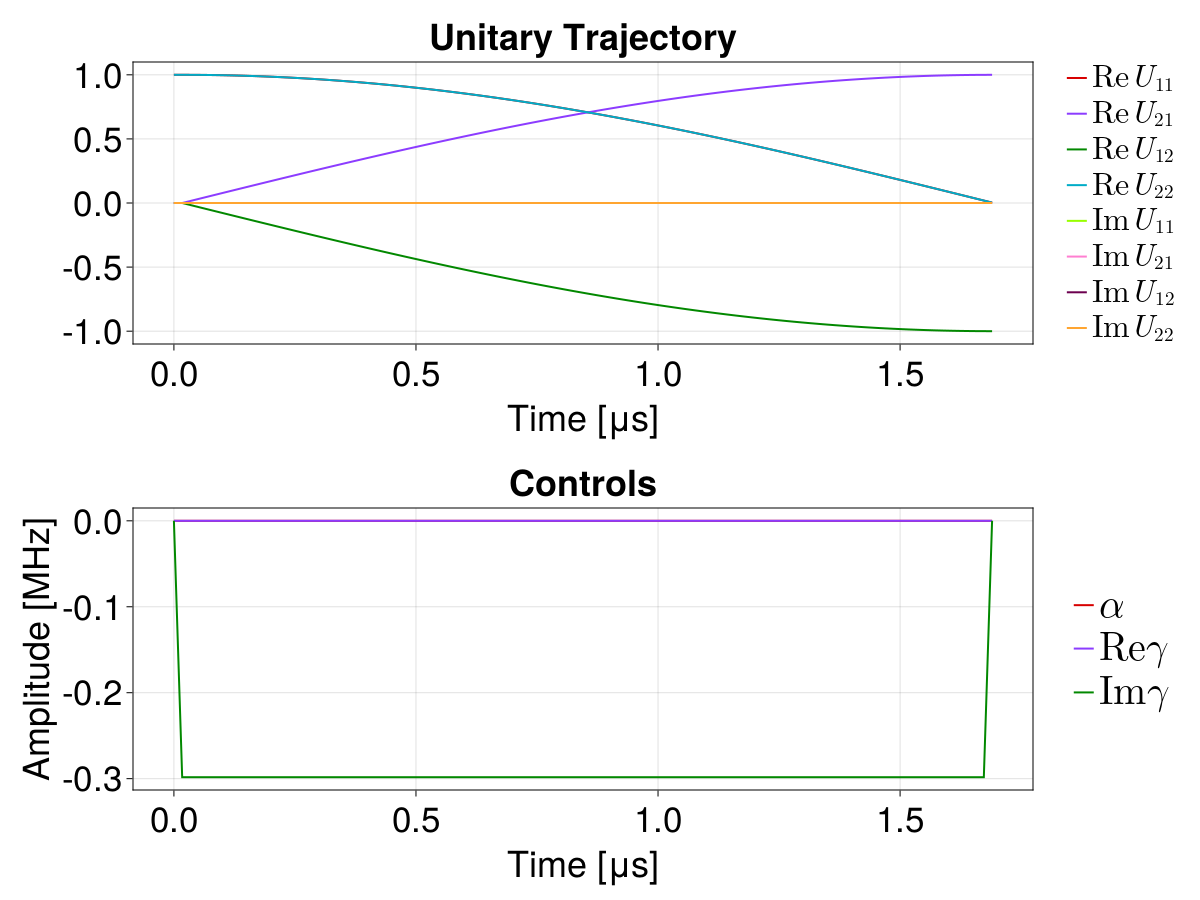

In [45]:
x = traj.Ũ⃗
u = vcat(traj.α, traj.γ) / 2π
ts = get_times(traj) .- traj.Δt[end]

# U_labels = [L"U_{11}^R", L"U_{21}^R", L"U_{12}^R", L"U_{22}^R", L"U_{11}^I", L"U_{21}^I", L"U_{12}^I", L"U_{22}^I"]
U_labels = [L"\text{Re} U_{11}", L"\text{Re} U_{21}", L"\text{Re} U_{12}", L"\text{Re} U_{22}", L"\text{Im} U_{11}", L"\text{Im} U_{21}", L"\text{Im} U_{12}", L"\text{Im} U_{22}"]

labels_controls = [L"\alpha", L"\text{Re} \gamma", L"\text{Im} \gamma"]
states_title = "Unitary Trajectory"

ylabel_states = "" 
ylabel_controls = "Amplitude [MHz]"

fig = plot_states_and_controls(x, u, ts; labels_states=U_labels, labels_controls=labels_controls, title_states=states_title, ylabel_controls=ylabel_controls, ylabel_states=ylabel_states)

In [46]:
save(plot_path, fig)

CairoMakie.Screen{SVG}
